In [25]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import csv

class Struct:
    pass

## Define a classe do Problema (MyProblem) e a classe que tem as funções do VNS (MyVNS)

In [26]:
class MyRVNS:
    def shake(self, x, k, probdata):
        # o objetivo do shake é escolher uma solução aleatoria da k-esima estrutura de vizinhança
        
        y = copy.deepcopy(x)

        ridx1 = np.random.randint(0, probdata.n)
        ridx2 = np.random.randint(0, probdata.n)
        ridx3 = np.random.randint(0, probdata.n)
        
        # trocar as manutenções de lugar não afeta o custo o objetivo
        if k == 1:             # troca o plano de manutenção de uma maquina aleatoria por um mais barato
            y.solution[ridx1] = x.solution[ridx1] - 1 if x.solution[ridx1] > 0 else x.solution[ridx1]
        elif k == 2:           # de duas aleatorias
            y.solution[ridx1] = x.solution[ridx1] - 1 if x.solution[ridx1] > 0 else x.solution[ridx1]
            y.solution[ridx2] = x.solution[ridx2] - 1 if x.solution[ridx2] > 0 else x.solution[ridx2]
        elif k == 3:           # de três aleatorias
            y.solution[ridx1] = x.solution[ridx1] - 1 if x.solution[ridx1] > 0 else x.solution[ridx1]
            y.solution[ridx2] = x.solution[ridx2] - 1 if x.solution[ridx2] > 0 else x.solution[ridx2]
            y.solution[ridx3] = x.solution[ridx3] - 1 if x.solution[ridx3] > 0 else x.solution[ridx3]
        
        return y

    def neighborhoodChange(self, x, y, k):
        # toma a decisao de muda de vizinhança, comparando a solução imcubente x com a solução do shake y
        
        if y.fitness < x.fitness:
            x = copy.deepcopy(y)
            k = 1
        else:
            k += 1
            
        return x, k

In [27]:
class MyProblem:
    def fobj(self, x, probdata):
        # x.solution é um vetor com os custos de manutenção da i-esima maquina
        # é só somar o vetor que temos a solução
        fitness = np.sum(x.solution)
        
        x.fitness = fitness
        # print(fitness)
        return x


    def sol_inicial(self, probdata, apply_constructive_heuristic):
    
        '''  
        Modelou-se uma solução x como a sequência de manutenções atribuídas em um vetor. exemplo
        
            m1 m2 ... m500
        x = [2 0 ... 1]

            nesse exemplo, a maquina m1 executa a manutenção que tem custo 2, a maquina 2 manutenção que tem custo 1, ...
        '''
        
        if apply_constructive_heuristic == False:        
            # Constrói solução inicial aleatoriamente
            x = Struct()
            x.solution = np.random.randint(0, 2 + 1, size=(probdata.n))
        
        else:
            # Constrói solução inicial usando uma heurística construtiva
            x = Struct()
            x.solution = []
            job = np.argsort(probdata.c.var(axis=0))    # tarefas ordenadas de acordo com a variância dos custos
            for tarefa in job[::-1]:        
                agent = np.argmin(probdata.c[:,tarefa]) # atribui as tarefas em ordem decrescente de variância ao agente de menor custo
                x.solution.insert(agent,tarefa)
            
        return x

    def probdef(self):
        n = 500 # numero de equipamentos

        # extrai os dados do CSV e salva na matriz
        equip_db = np.zeros(shape=(n, 4))

        with open('../arquivos_tc/EquipDB.csv', newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')

            for idx, row in enumerate(spamreader):
                row_array = ', '.join(row).split(',')
                data_array = []
                
                for item in row_array:
                    data_array.append(float(item))

                equip_db[idx] = np.array(data_array)

        # agora le o arquivo mpdb
        mpdb = np.zeros(shape=(3, 3))

        # custos do problema sao a ultima coluna do mpdb
        c = np.zeros(3)

        with open('../arquivos_tc/MPDB.csv', newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')

            for idx, row in enumerate(spamreader):
                row_array = ', '.join(row).split(',')
                data_array = []
                
                for item in row_array:
                    data_array.append(float(item))

                mpdb[idx] = np.array(data_array)
                c[idx] = data_array[len(data_array) - 1]

        probdata = Struct()
        probdata.equip_db = equip_db
        probdata.mpdb = mpdb
        probdata.c = c
        probdata.n = n
            
        return probdata

# Loop principal começa aqui


--- MELHOR SOLUÇÃO ENCONTRADA ---

Manutenções atribuídas aos agentes:

x = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 

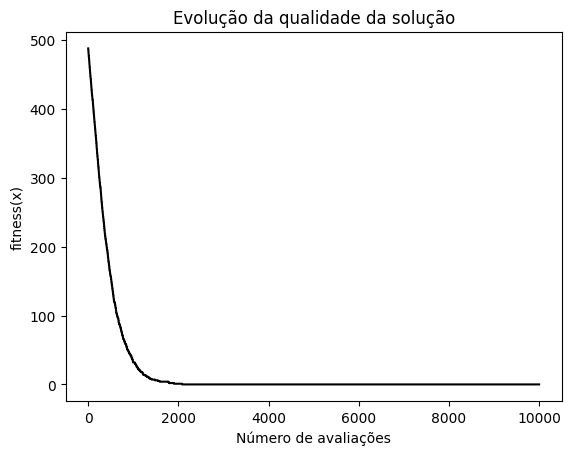

In [ ]:
myProblem = MyProblem()
myRVNS = MyRVNS()

num_sol_avaliadas = 0
max_num_sol_avaliadas = 10000
kmax = 3 # Número de estruturas de vizinhanças definidas

# salva os dados do problema 
probdata = myProblem.probdef()

# gera uma solução inicial aleatória
x = myProblem.sol_inicial(probdata, apply_constructive_heuristic=False)

# Avalia solução inicial
x = myProblem.fobj(x, probdata)
num_sol_avaliadas += 1

# agora é definir os shake e vizinhanças do VNS para ele achar a solução ótima

# Armazena dados para plot
historico = Struct()
historico.sol = []
historico.fit = []
historico.sol.append(x.solution)
historico.fit.append(x.fitness)

# Ciclo iterativo do método
while num_sol_avaliadas < max_num_sol_avaliadas:
    
    k = 1
    while k <= kmax:
        
        # Gera uma solução candidata na k-ésima vizinhança de x        
        y = myRVNS.shake(x,k,probdata)
        y = myProblem.fobj(y,probdata)
        num_sol_avaliadas += 1
        
        # Atualiza solução corrente e estrutura de vizinhança (se necessário)
        x,k = myRVNS.neighborhoodChange(x,y,k)
        
        # Armazena dados para plot
        historico.sol.append(x.solution)
        historico.fit.append(x.fitness)


print('\n--- MELHOR SOLUÇÃO ENCONTRADA ---\n')
print('Manutenções atribuídas às máquinas:\n')
print('x = {}\n'.format(x.solution))
print('fitness(x) = {:.1f}\n'.format(x.fitness))

plt.figure()
s = len(historico.fit)
plt.plot(np.linspace(0,s-1,s),historico.fit,'k-')
plt.title('Evolução da qualidade da solução');
plt.xlabel('Número de avaliações');
plt.ylabel('fitness(x)');
plt.show()